##### Load packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

##### Load data

In [3]:
data = pd.read_csv("creditcard.csv", index_col = 0)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Exploratory data anlysis

First, we will examine the given data, i.e. 
- check for any missing values
- summary statistics
- balance between the classes of the outcome variable 
- distributions of the variables
- linear relationships between the dependent and independent variables

We will use these methods to check the assumptions of a linear regression model:
- Indepence of errors (requires modeling)
- Lack of multicolinearity
- Adequate sample size (at least ten cases per predictor)
- Binary outcome
- No outliers
- No missing data

In [4]:
data.shape

(284807, 30)

#### To do:
    - initial model with just main effects
    - VIF
    - add interaction terms 
    - 

##### Check for missing values

<Axes: ylabel='Time'>

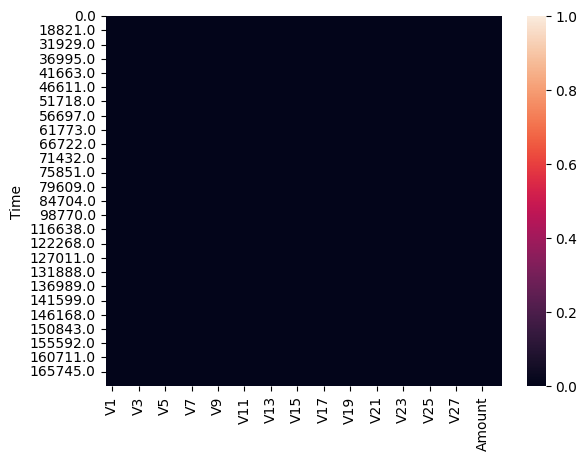

In [4]:
sns.heatmap(data.isna(), vmax=1, vmin=0)

##### Summary statistics

In [5]:
data.describe().round(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


Based on the summary statistics we can see that the variables are not scaled uniformly. 

Therefor we will plot the distributions and look for any linear relationships between variables.

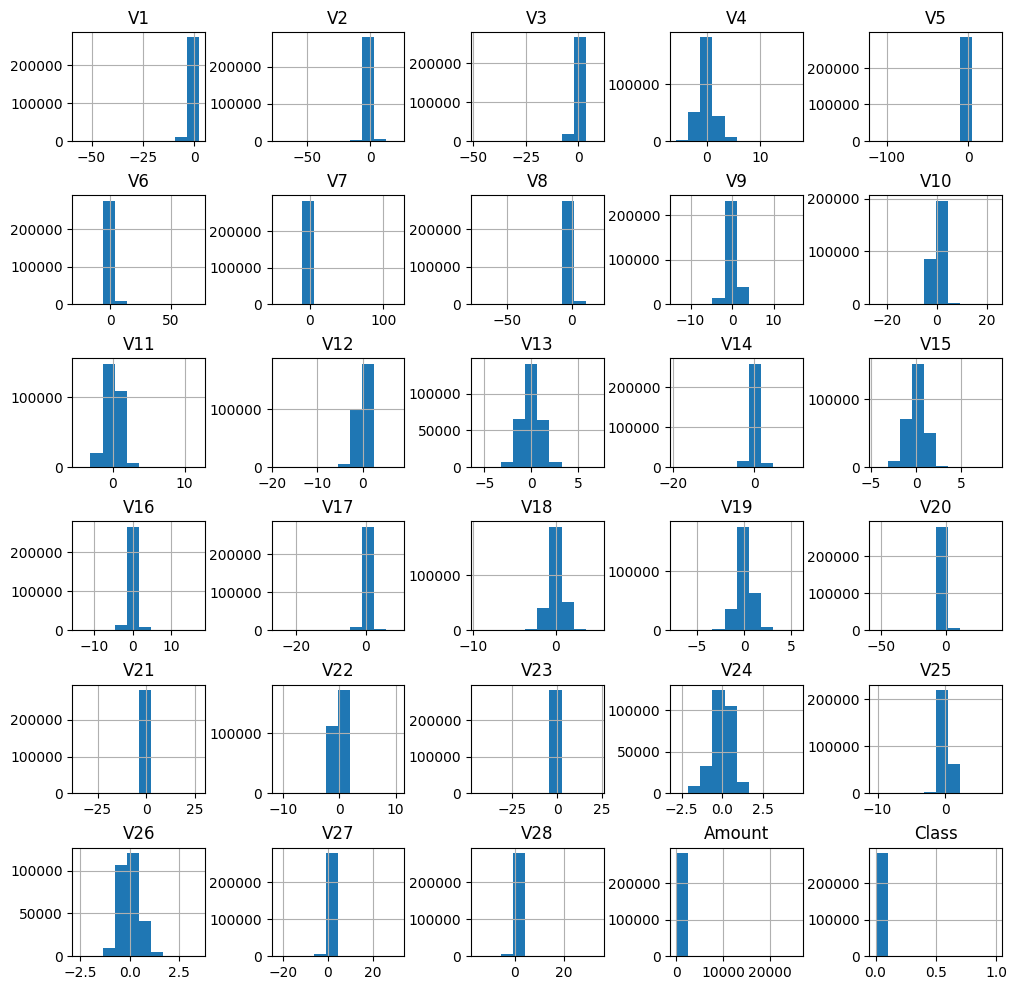

In [6]:
#plot a histogram for each variable
fig, axis = plt.subplots(6, 5, figsize=(12, 12))

data.hist(ax=axis)
# np.log(data.iloc[:,: -2]).hist(ax=axis)
plt.subplots_adjust(wspace = 0.5, hspace = 0.5);

We will now plot a correlation matrix.

Since our variables are not normally distributed we use Spearman's rank correlation.

In [7]:
#check for colinearity
corr_map = data.corr(method = 'spearman')
cordf = pd.DataFrame(corr_map) 

<Axes: >

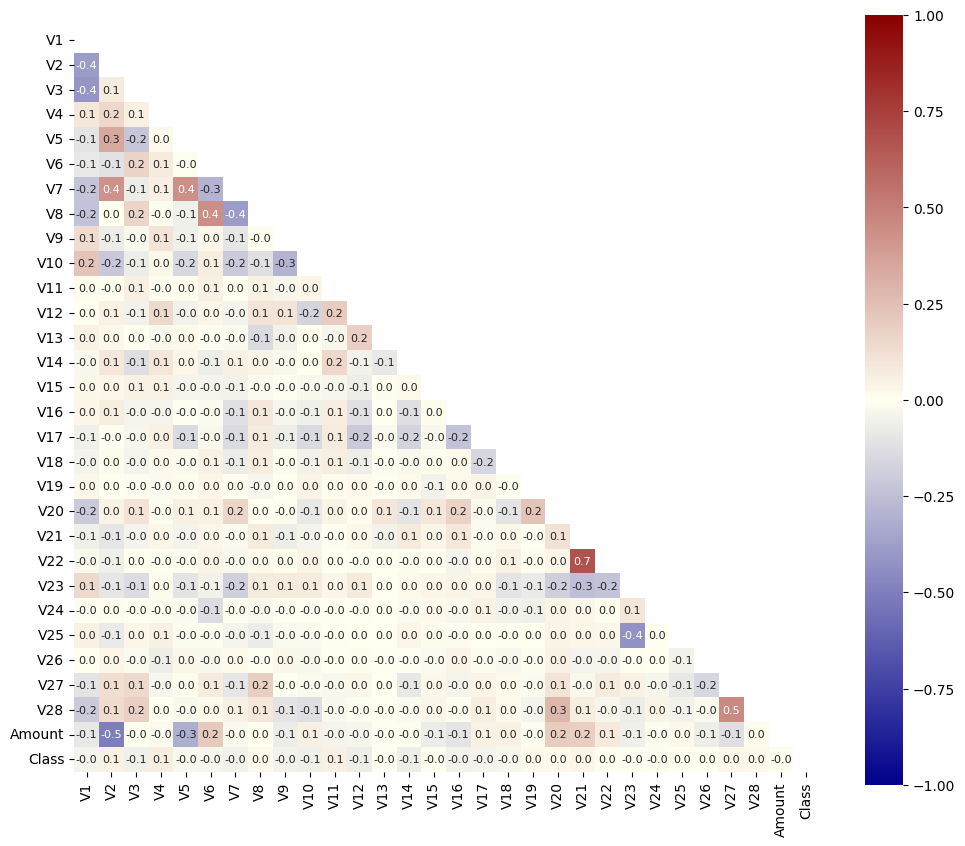

In [8]:
#create a mask with bool vals, which covers the upper half of the correlation matrix; triu = upper, til=lower triangle
mask = np.triu(np.ones_like(corr_map))
cstyle = sns.blend_palette(['darkblue', 'ivory','darkred'], as_cmap = True)
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cordf, mask=mask, square=True, annot = True, annot_kws={"size": 8}, cmap = cstyle, vmin=-1, vmax=1, fmt=".1f")

From the correlation matrix we can infer that with very few exemptions (e.g.V27/V28 or the negative correlation of V1/V28) there is only weak correlation between the variables. It is also of note that we see no correlation between the dependent variable (Class) and the independent variables, i.e. none of the variables seems to be a good predictor for the outcome variable.

To understand why, let us look at the ratio of the classes of the outcome variable.


In [9]:
data.groupby(['Class'])['Class'].count()

Class
0    284315
1       492
Name: Class, dtype: int64

Due to the extremely imbalance nature of our predictor classes, correlations with the raw outcome variable might be misleading. To illustrate this we can also look at the relationships between the independent variables and Class = 1. 

<Axes: >

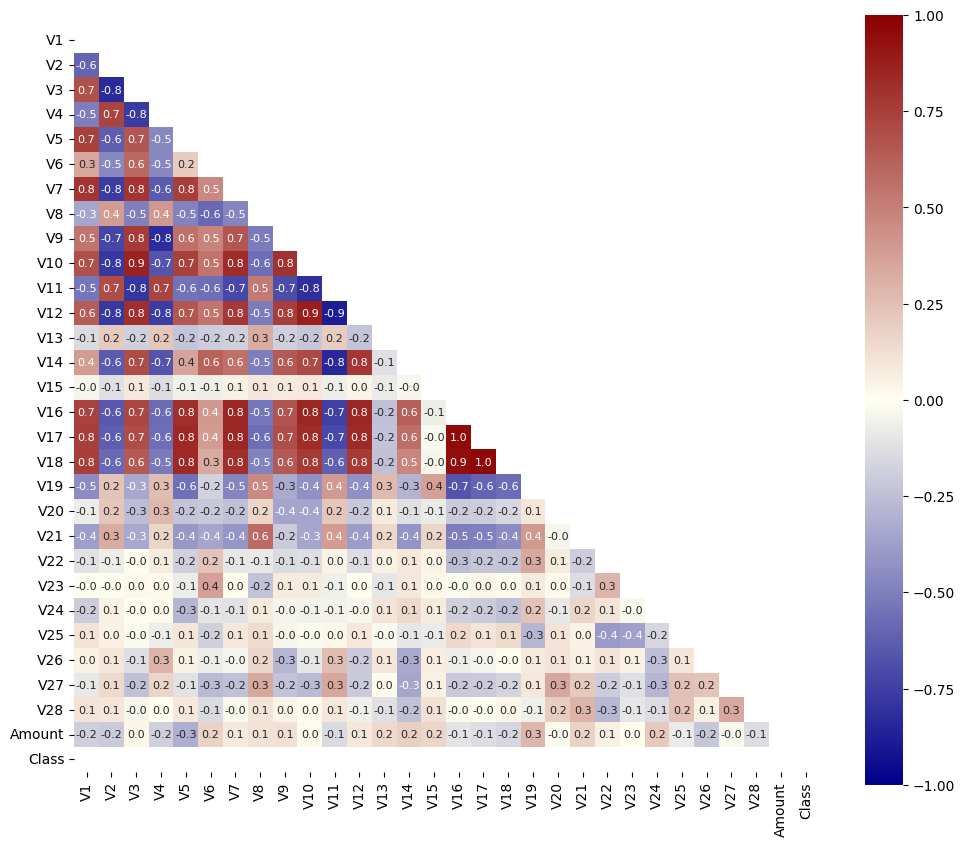

In [10]:
#Check correlations for Class = 1
corr_map_C1 = data[data['Class'] == 1].corr('spearman')
cordf_C1 = pd.DataFrame(corr_map_C1)
mask_C1 = np.triu(np.ones_like(corr_map_C1))
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cordf_C1, mask=mask_C1, square=True, annot = True, annot_kws={"size": 8}, cmap = cstyle, vmin=-1, vmax=1, fmt=".1f")

It is apparent that for the fraud cases the relationships between thr predicotr variables are more pronounced.

Note: There are no relationships with the 'Class'. The correlation coefficient is calculated based on the standard deviation of the variables. Since we have set 'Class' = 1 the SD('Class') = 0. Thus, the correlation coefficient is undefined.

Next, we will look for outliers in the data and their relationship to the fraud cases.

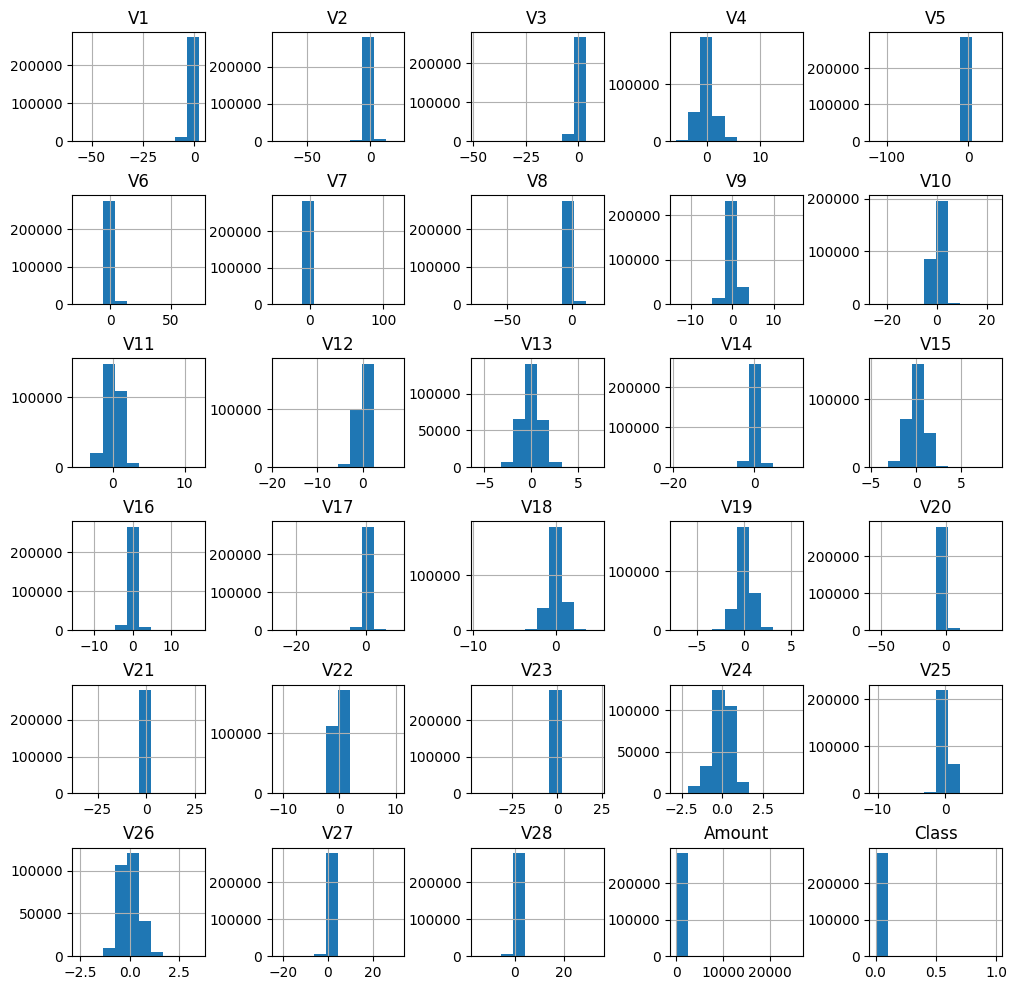

In [11]:
#plot a histogram for each variable
fig, axis = plt.subplots(6, 5, figsize=(12, 12))

data.hist(ax=axis)
# np.log(data.iloc[:,: -2]).hist(ax=axis)
plt.subplots_adjust(wspace = 0.5, hspace = 0.5);

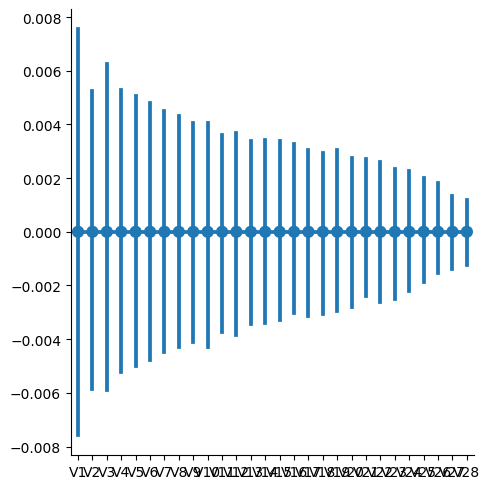

In [37]:
# Create the figure and axis objects
sns.catplot(data = data.iloc[:,:-2], kind="point")


In [12]:
from scipy import stats

data_zscore = data

In [13]:
data_zscore.iloc[:,: -1] = stats.zscore(data_zscore.iloc[:,: -1]).round(2)

In [18]:
data_zscore.describe().round(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,...,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.04
min,-28.80,-44.04,-31.87,-4.01,-82.41,-19.64,-35.21,-61.30,-12.23,-22.58,...,-47.42,-15.07,-71.75,-4.68,-19.75,-5.40,-55.91,-46.75,-0.35,0.00
25%,-0.47,-0.36,-0.59,-0.60,-0.50,-0.58,-0.45,-0.17,-0.59,-0.49,...,-0.31,-0.75,-0.26,-0.59,-0.61,-0.68,-0.18,-0.16,-0.33,0.00
50%,0.01,0.04,0.12,-0.01,-0.04,-0.21,0.03,0.02,-0.05,-0.09,...,-0.04,0.01,-0.02,0.07,0.03,-0.11,0.00,0.03,-0.27,0.00
75%,0.67,0.49,0.68,0.52,0.44,0.30,0.46,0.27,0.54,0.42,...,0.25,0.73,0.24,0.73,0.67,0.50,0.23,0.24,-0.04,0.00
max,1.25,13.36,6.19,11.92,25.21,55.02,97.48,16.75,14.19,21.81,...,37.03,14.47,36.08,7.57,14.43,7.29,78.32,102.54,102.36,1.00


In [ ]:
sns.stripplot(data = data_zscore, x="day", y="total_bill", hue="smoker",
              jitter=True,
              palette="Set2", dodge=True,linewidth=1,edgecolor='gray')

sns.boxplot(data = data_zscore, x="day", y="total_bill", hue="smoker",
            data=tips,palette="Set2",fliersize=0)

In [15]:
sns.boxplot(y=data_zscore.iloc[:, :-1])
plt.title("Boxplot of z-scored predictors")
plt.ylabel("Z-score")
plt.show()


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

how do outliers influence Class =1?
oversampling

In [114]:
#remove outliers (z-score >3) from all columns except Class
data_clean = data[(np.abs(stats.zscore(data.iloc[:, :-1])) < 3).all(axis=1)]

In [11]:
data_clean.shape

(246991, 30)

In [12]:
#z-score all vars for class=1
stats.zscore(data[data['Class'] == 1].iloc[:, :-1]).describe().round(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,...,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00
mean,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,...,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.80,-2.81,-3.39,-2.04,-3.53,-2.70,-5.28,-6.13,-4.34,-3.87,...,-3.35,-6.08,-5.96,-12.18,-3.73,-6.06,-2.56,-5.41,-3.56,-0.48
25%,-0.19,-0.57,-0.23,-0.76,-0.31,-0.59,-0.33,-0.11,-0.52,-0.43,...,-0.40,-0.17,-0.37,-0.19,-0.64,-0.45,-0.66,-0.14,-0.34,-0.47
50%,0.36,-0.21,0.28,-0.13,0.30,-0.01,0.35,0.01,0.15,0.22,...,-0.07,-0.03,0.02,-0.02,0.09,0.06,-0.10,0.16,0.13,-0.44
75%,0.64,0.31,0.67,0.63,0.63,0.53,0.64,0.18,0.72,0.63,...,0.33,0.14,0.40,0.22,0.76,0.52,0.73,0.48,0.56,-0.06
max,1.02,4.30,1.31,2.64,2.65,4.24,1.58,2.86,2.38,1.98,...,7.94,6.85,5.59,3.49,2.32,2.72,5.72,2.10,3.12,7.81


In [13]:
data_clean.describe().round(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,246991.00,246991.00,246991.00,246991.00,246991.00,246991.00,246991.00,246991.00,246991.00,246991.00,...,246991.00,246991.00,246991.00,246991.00,246991.00,246991.00,246991.00,246991.00,246991.00,246991.00
mean,0.30,0.03,0.10,-0.06,-0.00,-0.09,0.03,0.07,-0.04,-0.04,...,-0.02,0.00,-0.00,0.00,0.01,-0.00,0.01,0.00,64.50,0.00
std,1.41,0.99,1.29,1.27,1.02,1.10,0.78,0.54,0.98,0.77,...,0.32,0.68,0.27,0.58,0.46,0.46,0.21,0.15,111.09,0.01
min,-5.87,-4.95,-4.53,-4.24,-4.12,-3.93,-3.67,-3.57,-3.29,-3.25,...,-2.18,-2.18,-1.86,-1.82,-1.56,-1.44,-1.21,-0.99,0.00,0.00
25%,-0.76,-0.56,-0.77,-0.84,-0.67,-0.77,-0.51,-0.19,-0.62,-0.51,...,-0.22,-0.54,-0.15,-0.35,-0.30,-0.32,-0.07,-0.05,5.38,0.00
50%,0.40,0.05,0.23,-0.04,-0.07,-0.32,0.05,0.02,-0.06,-0.10,...,-0.03,0.00,-0.01,0.04,0.02,-0.05,-0.00,0.01,20.37,0.00
75%,1.42,0.74,1.05,0.68,0.55,0.27,0.55,0.30,0.55,0.38,...,0.17,0.52,0.13,0.43,0.35,0.23,0.08,0.07,70.00,0.00
max,2.45,4.95,4.10,4.25,4.14,4.00,3.71,3.58,3.30,3.26,...,2.20,2.17,1.87,1.39,1.56,1.45,1.21,0.99,838.07,1.00


Plot correlations without outliers

<Axes: >

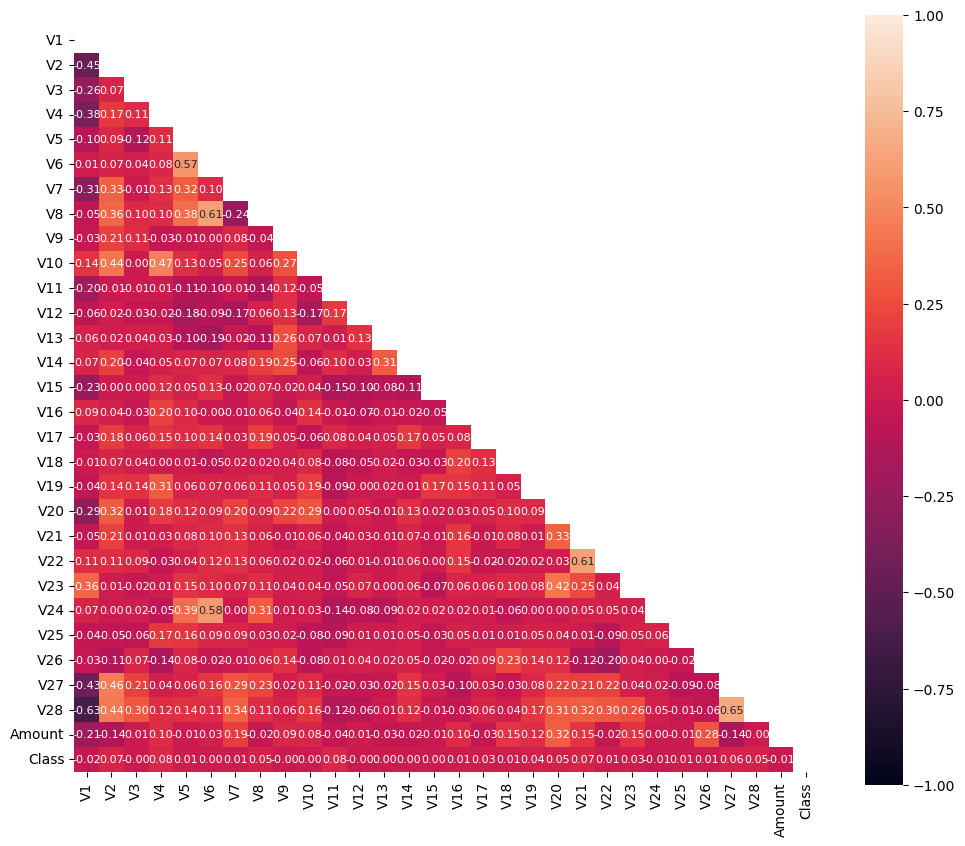

In [115]:
corr_map2 = data.corr('spearman')
cordf2 = pd.DataFrame(corr_map2)
mask = np.triu(np.ones_like(corr_map2))
cstyle = sns.blend_palette(['darkblue', 'white', 'crimson'], as_cmap = True)
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cordf2, mask=mask, square=True, annot = True, annot_kws={"size": 8}, vmin=-1, vmax=1, fmt=".2f")

In [111]:
#correalations without outliers for Class 1
data_clean[data_clean['Class'] == 1].describe().round(2)

NameError: name 'data_clean' is not defined

In [110]:
data_clean[data_clean['Class'] == 1]

NameError: name 'data_clean' is not defined

In [109]:
corr_map_c1_clean = data_clean[data_clean['Class'] == 1].corr('spearman')
cordf_c1_clean = pd.DataFrame(corr_map_c1_clean)
mask_c1_clean = np.triu(np.ones_like(corr_map_c1_clean))
cstyle = sns.blend_palette(['darkblue', 'white', 'crimson'], as_cmap = True)
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cordf_c1_clean, mask=mask_c1_clean, square=True, annot = True, annot_kws={"size": 8}, vmin=-1, vmax=1, fmt=".2f")

NameError: name 'data_clean' is not defined

Conclusion:
Correlations for Class I and independent vairables changed --> keep data with and without outliers for modeling.

#### split data

In [15]:
y = data['Class']
X = data.drop(['Class'], axis =1)
yc = data_clean['Class']
Xc = data_clean.drop(['Class'], axis =1)
y.shape, X.shape, yc.shape, Xc.shape

((284807,), (284807, 29), (246991,), (246991, 29))

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 69)
X_train.shape, y_train.shape

((227845, 29), (227845,))

In [18]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size = .20, random_state = 69)
Xc_train.shape, yc_train.shape

((197592, 29), (197592,))

### Feature engineering

#### scale ind vars to uniform range

In [19]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, QuantileTransformer

In [20]:
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=True)

In [12]:
qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal', random_state=69)

In [13]:
X_train_pt = pt.fit_transform(X_train)
X_train_qt = qt.fit_transform(X_train)

In [14]:
labels = pt.get_feature_names_out()

In [15]:
X_train_pt_df = pd.DataFrame(data=X_train_pt, columns = labels, index = X_train.index)
X_train_qt_df = pd.DataFrame(data=X_train_qt, columns = labels, index = X_train.index)
X_train_pt_df.describe(), X_train_qt_df.describe()

(                 V1            V2            V3            V4            V5  \
 count  2.278450e+05  2.278450e+05  2.278450e+05  2.278450e+05  2.278450e+05   
 mean  -1.193775e-16 -3.555131e-18  1.871121e-19 -7.235003e-18 -1.004168e-17   
 std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
 min   -7.630564e+00 -2.069450e+01 -1.009636e+01 -5.019573e+00 -2.986059e+01   
 25%   -7.229370e-01 -4.514876e-01 -7.112368e-01 -5.691211e-01 -5.100440e-01   
 50%   -2.491493e-01 -4.055926e-02 -2.590903e-02  6.312903e-02 -4.524914e-02   
 75%    7.360615e-01  4.753585e-01  6.727484e-01  5.821200e-01  4.465615e-01   
 max    1.869580e+00  2.319220e+01  1.144398e+01  8.568282e+00  2.500410e+01   
 
                  V6            V7            V8            V9           V10  \
 count  2.278450e+05  2.278450e+05  2.278450e+05  2.278450e+05  2.278450e+05   
 mean  -8.825456e-18  1.793158e-18  3.555131e-18 -8.482417e-18 -1.309785e-18   
 std    1.000002e+00  1.000002e+00  1.

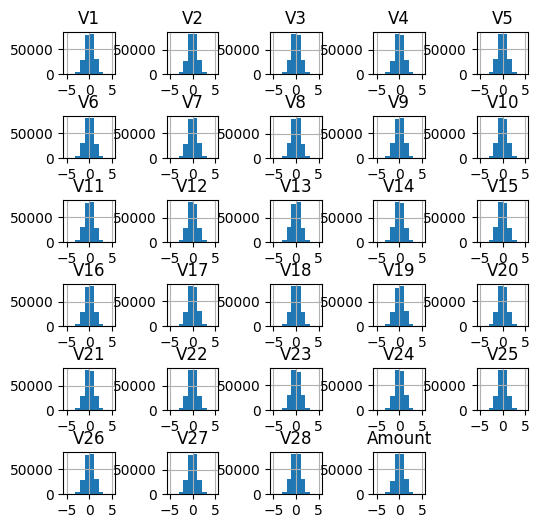

In [20]:
#create histogram for each column
X_train_qt_df.hist(figsize = (6, 6))
plt.subplots_adjust(wspace = 1, hspace = 1);

In [16]:
X_train_fe = X_train_qt_df

In [16]:
Xc_train_qt = pt.fit_transform(Xc_train)
Xc_train_qt_df = pd.DataFrame(data = Xc_train_qt, columns = pt.get_feature_names_out(), index=Xc_train.index)
Xc_train_qt_df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,1.975920e+05,1.975920e+05,1.975920e+05,1.975920e+05,1.975920e+05,1.975920e+05,1.975920e+05,1.975920e+05,1.975920e+05,1.975920e+05,...,1.975920e+05,1.975920e+05,1.975920e+05,1.975920e+05,1.975920e+05,1.975920e+05,1.975920e+05,1.975920e+05,1.975920e+05,1.975920e+05
mean,1.988593e-17,-1.044191e-17,-1.344908e-17,-1.625396e-17,-3.106053e-17,2.136030e-17,1.186683e-17,4.602892e-18,-9.367605e-18,-1.776429e-17,...,2.337406e-17,1.832167e-17,-3.470149e-18,-4.530972e-18,-3.193257e-17,1.672144e-18,2.369770e-17,8.666383e-18,-8.724818e-18,3.119179e-16
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-3.399891e+00,-4.434318e+00,-3.065821e+00,-3.587631e+00,-5.203075e+00,-8.044998e+00,-4.900336e+00,-6.387067e+00,-3.430428e+00,-4.886415e+00,...,-1.005258e+01,-7.493188e+00,-3.253340e+00,-8.623789e+00,-2.475564e+00,-3.197588e+00,-3.844570e+00,-4.894641e+00,-5.255305e+00,-1.989028e+00
25%,-8.166374e-01,-6.209357e-01,-7.226901e-01,-5.958867e-01,-6.191215e-01,-6.254367e-01,-6.876610e-01,-4.945676e-01,-5.954773e-01,-5.833442e-01,...,-5.014677e-01,-6.281121e-01,-7.999071e-01,-5.234907e-01,-6.885955e-01,-6.926431e-01,-6.618056e-01,-3.853177e-01,-4.253332e-01,-7.747201e-01
50%,-4.544017e-02,-2.173212e-02,2.936640e-02,5.499719e-02,1.911294e-02,2.367391e-04,3.617023e-02,-1.060702e-01,-1.164971e-02,-2.051793e-02,...,-6.010875e-02,-1.913774e-02,9.406320e-03,8.483452e-03,-5.653429e-02,-3.173891e-03,-1.941922e-02,-7.143656e-02,-1.254585e-02,-1.281077e-04
75%,7.873055e-01,6.943460e-01,7.195967e-01,6.027009e-01,6.029075e-01,6.053534e-01,6.717124e-01,4.089678e-01,6.081050e-01,5.886330e-01,...,4.708812e-01,6.095711e-01,7.593277e-01,5.362584e-01,7.097584e-01,7.154839e-01,5.617018e-01,3.134744e-01,3.937857e-01,7.574909e-01
max,1.708815e+00,5.646313e+00,3.660027e+00,3.139268e+00,3.310038e+00,2.407922e+00,4.601351e+00,6.849299e+00,3.315956e+00,3.683309e+00,...,5.171594e+00,6.294526e+00,3.150994e+00,5.554927e+00,3.090780e+00,3.619342e+00,2.651013e+00,7.064846e+00,9.434408e+00,2.274846e+00


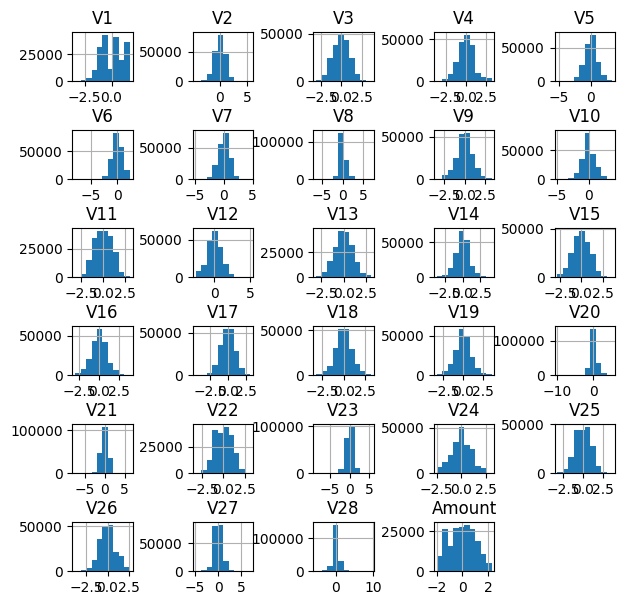

In [23]:
#create histogram for each column
Xc_train_qt_df.hist(figsize = (7, 7))
plt.subplots_adjust(wspace = 1, hspace = 1);

In [17]:
Xc_train_pt = pt.fit_transform(Xc_train)
Xc_train_pt_df = pd.DataFrame(data=Xc_train_pt, columns = labels, index = Xc_train.index)
Xc_train_pt_df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,1.975920e+05,1.975920e+05,1.975920e+05,1.975920e+05,1.975920e+05,1.975920e+05,1.975920e+05,1.975920e+05,1.975920e+05,1.975920e+05,...,1.975920e+05,1.975920e+05,1.975920e+05,1.975920e+05,1.975920e+05,1.975920e+05,1.975920e+05,1.975920e+05,1.975920e+05,1.975920e+05
mean,1.988593e-17,-1.044191e-17,-1.344908e-17,-1.625396e-17,-3.106053e-17,2.136030e-17,1.186683e-17,4.602892e-18,-9.367605e-18,-1.776429e-17,...,2.337406e-17,1.832167e-17,-3.470149e-18,-4.530972e-18,-3.193257e-17,1.672144e-18,2.369770e-17,8.666383e-18,-8.724818e-18,3.119179e-16
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-3.399891e+00,-4.434318e+00,-3.065821e+00,-3.587631e+00,-5.203075e+00,-8.044998e+00,-4.900336e+00,-6.387067e+00,-3.430428e+00,-4.886415e+00,...,-1.005258e+01,-7.493188e+00,-3.253340e+00,-8.623789e+00,-2.475564e+00,-3.197588e+00,-3.844570e+00,-4.894641e+00,-5.255305e+00,-1.989028e+00
25%,-8.166374e-01,-6.209357e-01,-7.226901e-01,-5.958867e-01,-6.191215e-01,-6.254367e-01,-6.876610e-01,-4.945676e-01,-5.954773e-01,-5.833442e-01,...,-5.014677e-01,-6.281121e-01,-7.999071e-01,-5.234907e-01,-6.885955e-01,-6.926431e-01,-6.618056e-01,-3.853177e-01,-4.253332e-01,-7.747201e-01
50%,-4.544017e-02,-2.173212e-02,2.936640e-02,5.499719e-02,1.911294e-02,2.367391e-04,3.617023e-02,-1.060702e-01,-1.164971e-02,-2.051793e-02,...,-6.010875e-02,-1.913774e-02,9.406320e-03,8.483452e-03,-5.653429e-02,-3.173891e-03,-1.941922e-02,-7.143656e-02,-1.254585e-02,-1.281077e-04
75%,7.873055e-01,6.943460e-01,7.195967e-01,6.027009e-01,6.029075e-01,6.053534e-01,6.717124e-01,4.089678e-01,6.081050e-01,5.886330e-01,...,4.708812e-01,6.095711e-01,7.593277e-01,5.362584e-01,7.097584e-01,7.154839e-01,5.617018e-01,3.134744e-01,3.937857e-01,7.574909e-01
max,1.708815e+00,5.646313e+00,3.660027e+00,3.139268e+00,3.310038e+00,2.407922e+00,4.601351e+00,6.849299e+00,3.315956e+00,3.683309e+00,...,5.171594e+00,6.294526e+00,3.150994e+00,5.554927e+00,3.090780e+00,3.619342e+00,2.651013e+00,7.064846e+00,9.434408e+00,2.274846e+00


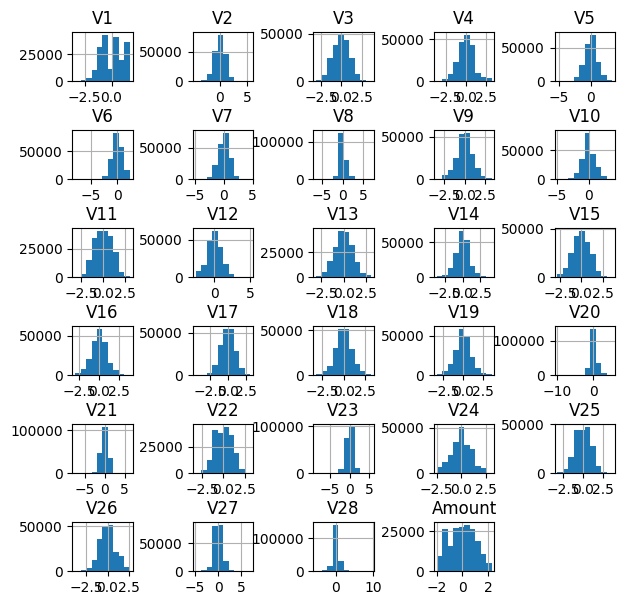

In [25]:
#create histogram for each column
Xc_train_pt_df.hist(figsize = (7, 7))
plt.subplots_adjust(wspace = 1, hspace = 1);

In [27]:
X_test_qt = pt.transform(X_test)
#Xc_test_qt = pt.transform(X_test)
X_test_fe = pd.DataFrame(data = X_test_qt, columns = pt.get_feature_names_out(), index=X_test.index)
#Xc_test_fe = pd.DataFrame(data = Xc_test_qt, columns = pt.get_feature_names_out(), index=Xc_test.index)

## Modeling

#### 1.2 Check for multicolinearity between variables with VIF

### initial prediction

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, fbeta_score, matthews_corrcoef
from sklearn.model_selection import GridSearchCV

In [39]:
#models
models = {
    "log reg": LogisticRegression(class_weight = 'balanced'),
    "tree": DecisionTreeClassifier(),
    "rf": RandomForestClassifier()
}

In [45]:
X_train_fe.shape, X_test_fe.shape

((227845, 29), (56962, 29))

In [42]:
for i in range(len(list(models))):
    model = list(models.values())[i] #select model
    model.fit(X_train_fe, y_train) #train model
    
    #make predictions
    y_train_pred = model.predict(X_train_fe)
    y_test_pred = model.predict(X_test_fe)
    
    #extract training set perofrmance metrics
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_fbeta = fbeta_score(y_train, y_train_pred, beta=2)
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_mcc = matthews_corrcoef(y_train, y_train_pred)
    
    #extract test set perofrmance metrics
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_fbeta = fbeta_score(y_test, y_test_pred, beta=2)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_mcc = matthews_corrcoef(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model perfromance for training')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Fbeta score: {:.4f}".format(model_train_fbeta))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- MCC score: {:.4f}".format(model_train_mcc))
    
    print('-'*20)
    
    print('Model perfromance for test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Fbeta score: {:.4f}".format(model_test_fbeta))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- MCC score: {:.4f}".format(model_test_mcc))
    
    print('='*20)

log reg
Model perfromance for training
- Accuracy: 0.9690
- Fbeta score: 0.2105
- Precision: 0.0514
- Recall: 0.9293
- MCC score: 0.2146
--------------------
Model perfromance for test set
- Accuracy: 0.9729
- Fbeta score: 0.1860
- Precision: 0.0448
- Recall: 0.8780
- MCC score: 0.1948
tree
Model perfromance for training
- Accuracy: 1.0000
- Fbeta score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- MCC score: 1.0000
--------------------
Model perfromance for test set
- Accuracy: 0.9974
- Fbeta score: 0.5664
- Precision: 0.3152
- Recall: 0.7073
- MCC score: 0.4711
rf
Model perfromance for training
- Accuracy: 1.0000
- Fbeta score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- MCC score: 1.0000
--------------------
Model perfromance for test set
- Accuracy: 0.9996
- Fbeta score: 0.8659
- Precision: 0.8659
- Recall: 0.8659
- MCC score: 0.8657


## class balancing

In [29]:
data.groupby(['Class']).size().reset_index(name='counts')

,Class,counts
0,0,284315
1,1,492


In [19]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

In [ ]:
pip install imblearn --user

#### undersampling and oversampling

In [78]:
#over-sample first
#define over_sampling method
os_mode = SMOTE(sampling_strategy={1: 10000}, random_state=10)

#define undersampling mods
us_mods = {
    "rus": RandomUnderSampler(sampling_strategy={0: 10000}, random_state=10),
    "nm": NearMiss(sampling_strategy={0: 10000})
}

#define sampling ratios
sampling_factors = [20_000, 40_000, 60_000, 80_000]

#create dictionaries to store each version of X_train and y_train
X_train_sampled_dict = {}
y_train_sampled_dict = {}

#first, loop through over-sampling loop
for factor in sampling_factors:
    #update oversampling factor
    updated_smote = os_mode.set_params(sampling_strategy={1: factor})
    #create input variables for modeling
    X_train_sm, y_train_sm = sm.fit_resample(X_train_fe, y_train)
    #print(f'SMOTE with factor: {factor}')

    #then, for each smote iteration iterate though undersampling methods
    for strategy_name, strategy in us_mods.items():
        #print(f"Undersampling mode: {strategy_name}")
    
        #iterate through each sampling factor in the list
        for factor in sampling_factors:
            #print(f"Under sampling factor: {factor}")

            #update the sampling_strategy based on the strategy_name
            updated_strategy = strategy.set_params(sampling_strategy={0: factor})

            #for each iteration create a new version of X_train and y_train
            X_train_smus, y_train_smus = strategy.fit_resample(X_train_sm, y_train_sm)

            # Store the sampled version of X_train in the dictionary
            key = f"X_train_{strategy_name}_{factor}"
            X_train_sampled_dict[key] = X_train_smus
            y_train_sampled_dict[key] = y_train_smus

            for i in range(len(list(models))):
                model = list(models.values())[i] #select model
                model.fit(X_train_smus, y_train_smus) #train model

                #make predictions
                y_train_pred = model.predict(X_train_smus)
                y_test_pred = model.predict(X_test_fe)

                #extract training set perofrmance metrics
                model_train_accuracy = accuracy_score(y_train_smus, y_train_pred)
                model_train_f1 = f1_score(y_train_smus, y_train_pred)
                model_train_precision = precision_score(y_train_smus, y_train_pred)
                model_train_recall = recall_score(y_train_smus, y_train_pred)
                model_train_rocauc = roc_auc_score(y_train_smus, y_train_pred)

                #extract test set perofrmance metrics
                model_test_accuracy = accuracy_score(y_test, y_test_pred)
                model_test_f1 = f1_score(y_test, y_test_pred)
                model_test_precision = precision_score(y_test, y_test_pred)
                model_test_recall = recall_score(y_test, y_test_pred)
                model_test_rocauc = roc_auc_score(y_test, y_test_pred)
               
                print(f'SMOTE with factor: {factor}')
                print(f'Undersampling by{strategy_name}, factor: {factor}')
                print(f'Fitting with model: {list(models.keys())[i]}')

                print('Model perfromance for training')
                print("- Accuracy: {:.4f}".format(model_train_accuracy))
                print("- F1 score: {:.4f}".format(model_train_f1))
                print("- Precision: {:.4f}".format(model_train_precision))
                print("- Recall: {:.4f}".format(model_train_recall))
                print("- ROC/AUC score: {:.4f}".format(model_train_rocauc))

                print('-'*20)

                print('Model perfromance for test set')
                print("- Accuracy: {:.4f}".format(model_test_accuracy))
                print("- F1 score: {:.4f}".format(model_test_f1))
                print("- Precision: {:.4f}".format(model_test_precision))
                print("- Recall: {:.4f}".format(model_test_recall))
                print("- ROC/AUC score: {:.4f}".format(model_test_rocauc))

                print('='*20)

SMOTE with factor: 20000
Undersampling mode: rus
Under sampling factor: 20000
lr
Model perfromance for training
- Accuracy: 0.9445
- F1 score: 0.9433
- Precision: 0.9642
- Recall: 0.9234
- ROC/AUC score: 0.9445
--------------------
Model perfromance for test set
- Accuracy: 0.9382
- F1 score: 0.0403
- Precision: 0.0206
- Recall: 0.9024
- ROC/AUC score: 0.9203
tree
Model perfromance for training
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC/AUC score: 1.0000
--------------------
Model perfromance for test set
- Accuracy: 0.9770
- F1 score: 0.0990
- Precision: 0.0525
- Recall: 0.8780
- ROC/AUC score: 0.9276
rf
Model perfromance for training
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC/AUC score: 1.0000
--------------------
Model perfromance for test set
- Accuracy: 0.9983
- F1 score: 0.6091
- Precision: 0.4596
- Recall: 0.9024
- ROC/AUC score: 0.9505
Under sampling factor: 40000
lr
Model perfromance for training
- Acc

In [20]:
from imblearn.combine import SMOTETomek

In [21]:
import numpy as np

In [37]:
from sklearn.metrics import fbeta_score

In [22]:
ros = RandomOverSampler(random_state=10)
smt = SMOTETomek(n_jobs = -1)

In [33]:
#define mods
us_mods = {
    "ros": RandomOverSampler(sampling_strategy=0.5, random_state=10),
    "smt": SMOTETomek(sampling_strategy=0.5, n_jobs = -1)
}

#define sampling ratios
sampling_factors = list(np.arange(0.5, 1.0, 0.05))

#create dictionaries to store each version of X_train and y_train
X_train_sampled_dict = {}
y_train_sampled_dict = {}

#create output table
results_table = [] 

for strategy_name, strategy in us_mods.items():
    #print(f"Undersampling mode: {strategy_name}")
    
    #iterate through each sampling factor in the list
    for factor in sampling_factors:
        #print(f"Under sampling factor: {factor}")

        #update the sampling_strategy based on the strategy_name
        updated_strategy = strategy.set_params(sampling_strategy=factor)

        #for each iteration create a new version of X_train and y_train
        X_train_sampled, y_train_sampled = strategy.fit_resample(X_train_fe, y_train)

        # Store the sampled version of X_train in the dictionary
        key = f"X_train_{strategy_name}_{factor}"
        X_train_sampled_dict[key] = X_train_sampled
        y_train_sampled_dict[key] = y_train_sampled

        for i in range(len(list(models))):
            model = list(models.values())[i] #select model
            model.fit(X_train_sampled, y_train_sampled) #train model

            #make predictions
            y_train_pred = model.predict(X_train_sampled)
            y_test_pred = model.predict(X_test_fe)

            #extract training set perofrmance metrics
            model_train_accuracy = accuracy_score(y_train_sampled, y_train_pred)
            model_train_fb = fbeta_score(y_train_sampled, y_train_pred, beta=2)
            model_train_precision = precision_score(y_train_sampled, y_train_pred)
            model_train_recall = recall_score(y_train_sampled, y_train_pred)
            model_train_rocauc = roc_auc_score(y_train_sampled, y_train_pred)

            #extract test set perofrmance metrics
            model_test_accuracy = accuracy_score(y_test, y_test_pred)
            model_test_fb = fbeta_score(y_test, y_test_pred, beta=2)
            model_test_precision = precision_score(y_test, y_test_pred)
            model_test_recall = recall_score(y_test, y_test_pred)
            model_test_rocauc = roc_auc_score(y_test, y_test_pred)
            
            results_table.append({
                "Sampling_strategy": strategy_name,
                "Sampling_factor": factor,
                "Model_name": list(models.keys())[i],
                "Accuracy_train": model_train_accuracy,
                "Fbeta score_train": model_train_f1,
                "Precision_train": model_train_precision,
                "Recall_train": model_train_recall,
                "Accuracy_test": model_test_accuracy,
                "Fbeta score_test": model_test_f1,
                "Precision_test": model_test_precision,
                "Recall_test": model_test_recall
                })
            
summary_df = pd.DataFrame(results_table)

print(summary_df)
            
            #print(f'Method: {strategy_name}, factor: {factor}')
            #print(f'Fitting with model: {list(models.keys())[i]}')

            #print('Model perfromance for training')
            #print("- Accuracy: {:.4f}".format(model_train_accuracy))
            #print("- F1 score: {:.4f}".format(model_train_f1))
            #print("- Precision: {:.4f}".format(model_train_precision))
            #print("- Recall: {:.4f}".format(model_train_recall))
            #print("- ROC/AUC score: {:.4f}".format(model_train_rocauc))

            #print('-'*20)

            #print('Model perfromance for test set')
            #print("- Accuracy: {:.4f}".format(model_test_accuracy))
            #print("- F1 score: {:.4f}".format(model_test_f1))
            #print("- Precision: {:.4f}".format(model_test_precision))
            #print("- Recall: {:.4f}".format(model_test_recall))
            #print("- ROC/AUC score: {:.4f}".format(model_test_rocauc))
            #print("- confusion matrix:").format(confusion_matrix(y_test, y_test_pred)

            #print('='*20)


C:\Users\MR\AppData\Roaming\Python\Python310\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
C:\Users\MR\AppData\Roaming\Python\Python310\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
C:\Users\MR\AppData\Roaming\Python\Python310\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
C:\Users\MR\AppData\Roaming\Python\Python310\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureW

   Sampling_strategy  Sampling_factor Model_name  Accuracy_train  \
0                ros             0.50         lr        0.955809   
1                ros             0.50       tree        1.000000   
2                ros             0.50         rf        1.000000   
3                ros             0.55         lr        0.954151   
4                ros             0.55       tree        1.000000   
5                ros             0.55         rf        1.000000   
6                ros             0.60         lr        0.954050   
7                ros             0.60       tree        1.000000   
8                ros             0.60         rf        1.000000   
9                ros             0.65         lr        0.953516   
10               ros             0.65       tree        1.000000   
11               ros             0.65         rf        1.000000   
12               ros             0.70         lr        0.952760   
13               ros             0.70       tree

In [29]:
#drop all columns ending with "train"
test_summary = summary_df.loc[:, ~summary_df.columns.str.endswith('_train')]
test_summary

NameError: name 'summary_df' is not defined

In [28]:
test_summary.groupby('Model_name')[test_summary['Recall_test']==max()]

NameError: name 'test_summary' is not defined

In [ ]:
#use parameter settings with the highest recall for hzperparameter optimization

### VIF

### 1. Check multicolinearity of independent variables

#### 1.1 Linear model with independent variables

split the subset of independent variables (X_xtrain) into train and test data sets

In [ ]:
from sklearn.model_selection import train_test_split

In [24]:
y_ind = X_train['V1']
X_ind = X_train.drop(['V1'], axis = 1)

In [25]:
X_ind_train, X_ind_test, y_ind_train, y_ind_test = train_test_split(X_ind, y_ind, test_size=.3, random_state=42)

Linear regression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm = LinearRegression()

In [26]:
lm.fit(X_ind_train, y_ind_train)

LinearRegression()

### model hyperparameter opt

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

In [ ]:
logr_params = {
    "penalty": ["l1", "l2"], #penalty type
    "C": 10.0**np.arange(-3,3), #lower = stronger regularization
    "class_weight": "balanced", 
    "penalty": ["saga", "newton-cholesky"], #saga = fast, every penalty, n-c: for n_rows>n_features, works only with L2 or None
}

In [ ]:
rf_params = {
    "max_depth": list(range(2, 9)), #levels of branches
    "max_features": ["sqrt", "log2", None], 
    "min_samples_leaf": [2, 3, 4, 5, 6], #min samples before branching
    "n_estimators": [10, 100, 200, 500, 1000], #n trees
    "class_weight": ["balanced", "balanced_subsample"] #balanced: calculated from y; bal_subs: from bootstrap samples
}

In [ ]:
tree_params = {
    "max_depth": list(range(2, 9)), #levels of branches
    "max_features": ["sqrt", "log2", None], 
    "min_samples_leaf": [2, 3, 4, 5, 6], #min samples per node
    "class_weight": ["balanced"] #balanced:calculated from y
}

In [ ]:
randomcv_models = [
    ("logreg", LogisticRegression(), logr_params),
    ("tree", DecisionTreeClassifier(), tree_params),
    ("rf", RandomForestClassifier(), rf_params)
                  ]

In [ ]:
randomcv_models

In [ ]:
model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                               param_distributions=params,
                               n_iter=20,#n_params settings sampled 
                               cv=10,
                               verbose=1,
                               n_jobs=-1)#uses all cores to run models in parallel
    random.fit(Xtrain_fe, ytrain)
    model_param[name] = random.best_params_
for model_name in model_param:
    print(f"---------- Best parameters for {model_name} -----------")
    print(model_param[model_name])

In [ ]:
for i in range(len(list(models))):
    model = list(models.values())[i] #select model
    model.fit(X_train_sm, y_train_sm) #train model
    
    #make predictions
    y_train_pred = model.predict(X_train_sm)
    y_test_pred = model.predict(X_test_fe)
    
    #extract training set perofrmance metrics
    model_train_accuracy = accuracy_score(y_train_sm, y_train_pred)
    model_train_f1 = f1_score(y_train_sm, y_train_pred)
    model_train_precision = precision_score(y_train_sm, y_train_pred)
    model_train_recall = recall_score(y_train_sm, y_train_pred)
    model_train_rocauc = roc_auc_score(y_train_sm, y_train_pred)
    
    #extract test set perofrmance metrics
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc = roc_auc_score(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model perfromance for training')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- ROC/AUC score: {:.4f}".format(model_train_rocauc))
    
    print('-'*20)
    
    print('Model perfromance for test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- ROC/AUC score: {:.4f}".format(model_test_rocauc))
    
    print('='*20)